# Homework 10: Inference in SLR and MLR 
***

**Name**: Matthew Riopelle

***

This assignment is due on Canvas by **6:00PM on Friday November 18**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

Here are some imports for this assignment:

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import numpy as np 
from scipy import stats
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
%matplotlib inline


# Problem 1
***

The business of programming is exploding in growth! As a programmer, it is important to lead a well rounded life and take care of your health. We are going to look at a data set of a sample of programmers, their overall happiness and some possible influences on their happiness.

Load `happiness.csv` as a dataframe called `dfHappy` and take a look at the data.

In [2]:
# Upload here and take a look at some of the data, .head(10) perhaps.
dfHappy = pd.read_csv("happiness.csv")
dfHappy.head(10)

,Index,happiness,grmsSgr,sunlight,screentime,BMI,ff
0,1,3.427723,52.984804,41.800653,148.656740,22.770203,53
1,2,5.381479,17.620582,83.681961,67.486945,18.965722,52
2,3,4.568705,33.145561,79.765209,83.085792,25.827328,48
3,4,1.560355,68.313223,39.734337,190.733508,19.102485,24
4,5,3.057388,53.587157,51.657807,113.854519,24.970149,2
5,6,0.727221,74.666532,14.594492,254.659872,25.115974,34
6,7,1.590356,62.672605,29.642536,176.756328,25.595235,34
7,8,4.258312,26.837312,79.765056,93.379803,23.654171,57
8,9,5.381398,18.659952,67.390751,52.556721,20.888795,48
9,10,5.890149,21.423596,98.044772,47.082464,27.589727,75


### Data description:

***Index***: This is just a number listing the ID of the programmer.

***happiness***: This is the measured happiness of the programmer on a scale from 0 to 7.

***grmsSgr***: This variable measures the grams of sugar intake per day.

***BMI***: This variable is the body mass index of the individual.

***screentime***: This variable measures the daily minutes of screentime that the programmer put in on a specified day. Some are low due to that day being a research, or field day, and some are high due to that day being a coding day.

***sunlight***: This variable measures the number of minutes taken during the day to be outdoors.

***ff***: This variable measures, on a scale from 0=none to 100=immediate, access to friends and family as a support system with the programmers particular job location. 

### What affects Happiness?

We are attempting to ascertain things that affect happiness. In problem 1 this will be done with Simple Linear Regression.

Determine the affect of each predictor variable in $\color{red}{\textbf{5 steps}}$: 

$\color{red}{\textbf{1]}}$: Make a scatter plot of predictor variable versus response variable. 

$\color{red}{\textbf{2]}}$: Come up with the regression line for the relationship.

Create the same scatterplot (from Step 1) with the line of best-fit imposed on it, $\textbf{AND}$ print the actual equation along with each graph.

That is, fit and $\textbf{print}$ a linear regression model to the data of the form 

$$
Y_i = \alpha + \beta x_i \quad \textrm{for } i=1,2, \ldots, 498 
$$

$\color{red}{\textbf{3]}}$: Find a measure for the goodness of fit of the regression line.

Explain what $R^2$ means in this case.

$\color{red}{\textbf{4]}}$: Create a $99\%$ confidence interval for the slope ($\beta$) of the regression line.

From step 2, notice the $\beta$ for the happiness relationship with sugar.

Explain your results: Is your $\beta$ statistic in the confidence interval? Is 0 included in the interval? 


$\color{red}{\textbf{5]}}$: For the relationship that you think you have discovered, the question is whether its really the case or if the downward/upward trend should be attributed to chance.

Perform a hypothesis test at the $\alpha = 0.01$ significance level to determine if the observed relationship between the predictor and the response is real by testing the hypotheses: 

$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$

$\color{blue}{\text{Explain your results}}$: Is there sufficient evidence to conclude that the observed relationship between the predictor and the response happiness is real? Answer with a p-value argument. Complete each step even if you find no legitimate linear relationship between variables. So, your answer ($\color{blue}{\text{p-value argument}}$) should take into account that we ARE making (without checking) the assumptions below:


### Assumptions

To begin with, we will assume all the $\color{blue}{\text{proper conditions}}$ for doing inference on slope:

-- $\color{blue}{\text{Linear}}$: The relationship between the independent variable and the dependent variable is linear.

-- $\color{blue}{\text{Independence}}$: The noise/errors are independent.

-- $\color{blue}{\text{Normal}}$: The errors are normally distributed.

-- $\color{blue}{\text{Equal Variance}}$: Homoscedastic errors.

-- $\color{blue}{\text{Random}}$: Random errors; unbiased.


### Here are some hints/formulas that may help you:

You may want to use `.max()` and `.min()` in order to find appropriate bounds for each scatterplot.

You may want to do some calculations without using canned functions. Here are some useful formulas:

$\hat{y}=\hat{a}+\hat{b}\cdot x$

$SSE = \sum{(y-\hat{y})^2}$

$\hat{\sigma^2} = \frac{SSE}{n-2}$

$SE_{\beta}=\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}$

$t_{\hat{\beta}}=\frac{\hat{\beta}-\beta}{\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}}$

$\text{p-value} = 2\cdot \text{CDF}(t_{\hat{\beta}}, n-2)$

$\color{blue}{\text{(25 points) }}$ ***Perform the $\color{red}{\text{5-steps}}$ mentioned above for $\textbf{EACH}$ predictor variable.*** 

***Complete each of the 5 steps mentioned above with a title (such as those below, but replace the question mark of course) and also create any extra needed cells for coding and explanations.***



### Predictor variable = grmsSugar, Step 1.

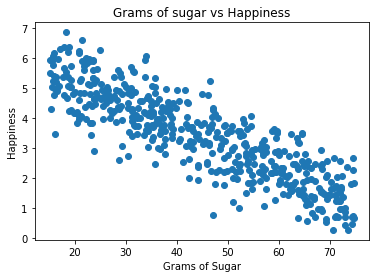

In [3]:
plt.xlabel("Grams of Sugar")
plt.ylabel("Happiness")
plt.title("Grams of sugar vs Happiness")
plt.scatter(dfHappy["grmsSgr"],dfHappy["happiness"])

### Predictor variable = grmsSugar, Step2.

The equation of the regression line is: y = 6.58116 + -0.07138x


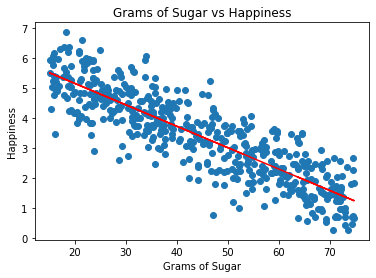

In [4]:
plt.xlabel("Grams of Sugar")
plt.ylabel("Happiness")
plt.title("Grams of Sugar vs Happiness")
plt.scatter(dfHappy["grmsSgr"],dfHappy["happiness"])
sbhat, sahat, srval, spval, sstderr = stats.linregress(dfPaddle["grmsSgr"], dfPaddle["happiness"])
plt.plot(dfHappy["grmsSgr"], sbhat*dfHappy["grmsSgr"] + sahat, color = "red")
print("The equation of the regression line is: y = {:.5f} + {:.5f}x".format(sahat, sbhat))

### Predictor variable = grmsSugar, Step3.

As you can see below, our $R^2 = 0.749$. This is a fairly high $R^2$ score, and therefore it means that roughy 75% of the variance in our data is explained by the model. This means that sugar and happiness are showing high levels of correlation given this data.

In [5]:
print("R^2 is equal to: {}".format(srval**2))

R^2 is equal to: 0.7491878907289607


### Predictor Variable = grmsSugar, Step4.

As you can see below, our confidence interval is roughly between [-0.07617, -0.06658]. 0 is NOT included within this confidence interval. This means that the data is significant at a 99% confidence level to show that sugar intake and happiness are related. Furthermore, my slope (-0.07138) does lie within this interval.

In [6]:
#finding 99% tcrit val
tcrit = stats.t.ppf(1-(.01/2), len(dfHappy)-2)
uSugarCI = sbhat + (tcrit * sstderr)
lSugarCI = sbhat - (tcrit * sstderr)
print("The 99% CI for the slope of this regression line is: [{},{}]".format(lSugarCI, uSugarCI))

The 99% CI for the slope of this regression line is: [-0.0761711072791075,-0.06658124235788959]


### Predictor variable = grmsSugar, Step5.

Looking at our data below, we have found a TINY p value. This means that the probability that sugar intake and happiness are NOT related is incredibly low. We can conclude since our pval < .01 that happiness and sugar intake DO have a real relationship. $\textbf{We reject the null hypothesis.}$

In [7]:
#test stat:
sugarTStat = sbhat/sstderr
sugarPVal = 2*(stats.t.cdf(sugarTStat, len(dfHappy)-2))
print("The p-value for sugar is: p = {}".format(sugarPVal))

The p-value for sugar is: p = 4.5167037984356374e-151


### Predictor variable = BMI, Step1.



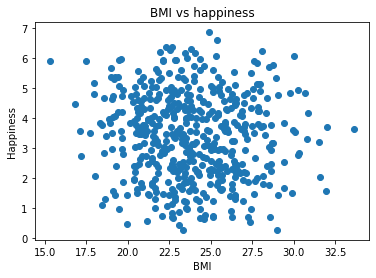

In [8]:
plt.xlabel("BMI")
plt.ylabel("Happiness")
plt.title("BMI vs happiness")
plt.scatter(dfHappy["BMI"],dfHappy["happiness"])

### Predictor variable = BMI, Step2.



The equation of the regression line is: y = 4.26156 + -0.03641x


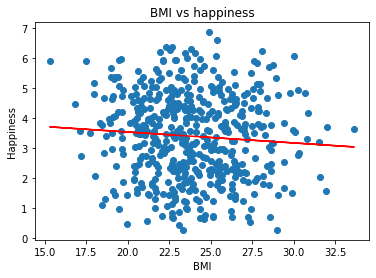

In [9]:
plt.xlabel("BMI")
plt.ylabel("Happiness")
plt.title("BMI vs happiness")
plt.scatter(dfHappy["BMI"],dfHappy["happiness"])
bbhat, bahat, brval, bpval, bstderr = stats.linregress(dfHappy["BMI"], dfHappy["happiness"])
plt.plot(dfHappy["BMI"], bbhat*dfHappy["BMI"] + bahat, color = "red")
print("The equation of the regression line is: y = {:.5f} + {:.5f}x".format(bahat, bbhat))

### Predictor variable = BMI, Step3.

As you can see below, the $R^2$ for the relationship between BMI and happiness in this data set is 0.0057. This is incredibly low, and means that barely ANY of our data is accounted for by the model. This means that it would not be a good idea to make precise predictions based on this model, $\textbf{BUT}$ it does not say whether we have the correct model.

In [10]:
print("R^2 is equal to: {}".format(brval ** 2))

R^2 is equal to: 0.005732414956422792


### Predictor variable = BMI, Step4.

The CI shown below (-0.092, 0.019) includes the slope (-0.036), and ALSO includes the number 0. This means that significant at a 99% confidence level, BMI and happiness are not related, given the data. We will seek to prove that below.

In [11]:
l_bmi_CI = bbhat - (tcrit * bstderr)
u_bmi_CI = bbhat + (tcrit * bstderr)
print("The 99% CI for the slope of BMI vs Happiness is: [{},{}]".format(l_bmi_CI, u_bmi_CI))

The 99% CI for the slope of BMI vs Happiness is: [-0.09208781463181609,0.019264943301827223]


### Predictor variable = BMI, Step5.

As you can see below, the p-value for the slope of BMI vs happiness is 0.09 > 0.01. Since our p-value is greater than our level of significance, we $\textbf{Fail to reject the null hypothesis}$. That is to say, there is NOT strong enough evidence given this data that BMI and happiness are related.

In [12]:
bmiTstat = bbhat/bstderr
bmiPval = 2*(stats.t.cdf(bmiTstat, len(dfHappy) - 2))
print("The P-value for the slope of BMI is: p = {}".format(bmiPval))

The P-value for the slope of BMI is: p = 0.09145428934378726


### Predictor variable = screentime, Step1.



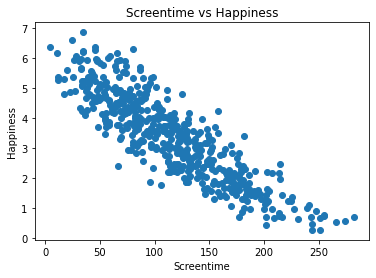

In [13]:
plt.xlabel("Screentime")
plt.ylabel("Happiness")
plt.title("Screentime vs Happiness")
plt.scatter(dfHappy["screentime"],dfHappy["happiness"])

### Predictor variable = screentime, Step2.



The equation of the regression line is: y = 6.04112 + -0.02306x


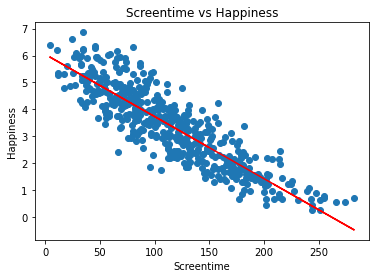

In [14]:
plt.xlabel("Screentime")
plt.ylabel("Happiness")
plt.title("Screentime vs Happiness")
plt.scatter(dfHappy["screentime"],dfHappy["happiness"])
stbhat, stahat, strval, stpval,ststderr = stats.linregress(dfHappy["screentime"], dfHappy["happiness"])
plt.plot(dfHappy["screentime"], stahat + (stbhat * dfHappy["screentime"]), color = "red")
print("The equation of the regression line is: y = {:.5f} + {:.5f}x".format(stahat, stbhat))

### Predictor variable = screentime, Step3.

The $R^2$ value below is fairly high for screentime vs happiness at 0.7657. This means that the model is a pretty dang good fit for the data, and that roughly 76.5% of its variation is explained by the model. 

In [15]:
print("The R^2 value screentime vs happiness is: {}".format(strval**2))

The R^2 value screentime vs happiness is: 0.765704298350007


### Predictor variable = screentime, Step4.

As you can see below, our CI (-0.0245, -0.0216) does NOT include 0. This means that significant at a 99% confidence level, screentime and happiness are related. Furthermore, our slope (-0.023) is included within this confidence interval.

In [16]:
l_ST_CI = stbhat - (tcrit * ststderr)
u_ST_CI = stbhat + (tcrit * ststderr)
print("The 99% CI for the slope of Screentime vs happiness is: [{},{}]".format(l_ST_CI, u_ST_CI))

The 99% CI for the slope of Screentime vs happiness is: [-0.024544905344008536,-0.02158239417069866]


### Predictor variable = screentime, Step5.

As we can see below, the p-value for the slope of screentime vs happiness is incredibly low. Since our p-value < 0.01, at a 1% level of significance we $\textbf{Reject the null hypothesis.}$ That is to say, there is a relationship between screentime and happiness given this data.

In [17]:
STtestStat = stbhat / ststderr
STpVal = 2*(stats.t.cdf(STtestStat, len(dfHappy)-2))
print("Our p value for the slope of screentime is: p = {}".format(STpVal))

Our p value for the slope of screentime is: p = 2.0570033369948355e-158


### Predictor variable = sunlight, Step1.



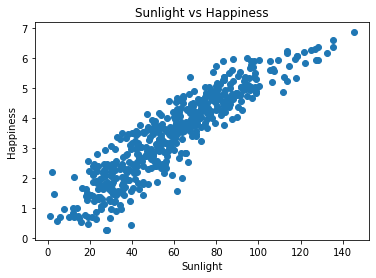

In [18]:
plt.xlabel("Sunlight")
plt.ylabel("Happiness")
plt.title("Sunlight vs Happiness")
plt.scatter(dfHappy["sunlight"],dfHappy["happiness"])

### Predictor variable = sunlight, Step2.



The equation of the regression line is: y = 0.57330 + 0.04828x


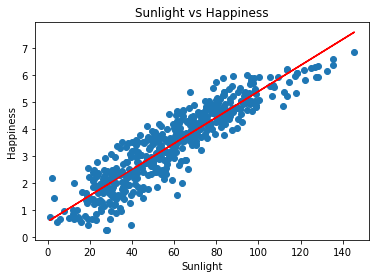

In [19]:
plt.xlabel("Sunlight")
plt.ylabel("Happiness")
plt.title("Sunlight vs Happiness")
plt.scatter(dfHappy["sunlight"],dfHappy["happiness"])
sunbhat, sunahat, sunrval, sunpval, sunstderr = stats.linregress(dfHappy["sunlight"], dfHappy["happiness"])
plt.plot(dfHappy["sunlight"], sunahat + (sunbhat * dfHappy["sunlight"]), color = "red")
print("The equation of the regression line is: y = {:.5f} + {:.5f}x".format(sunahat, sunbhat))

### Predictor variable = sunlight, Step3.

This is the highest $R^2$ value that we have seen so far. At roughly 83%, this is a very high R-value and means that the proportion of variation in this data is explained well by the model, and can also indicate that sunlight and happiness may be correlated.

In [20]:
print("The R^2 value for sunlight vs happiness is: {}".format(sunrval**2))

The R^2 value for sunlight vs happiness is: 0.8340432434993695


### Predictor variable = sunlight, Step4.

As shown below, our confidence interval (0.0458, 0.0508) does NOT include 0. This means that, significant at a 99% level of confidence, happiness and sunshine seem to be related. Furthermore, the slope (0.048) IS included within this interval.

In [21]:
l_sun_CI = sunbhat - (tcrit*sunstderr)
u_sun_CI = sunbhat + (tcrit*sunstderr)
print("The 99% CI for the slope of sunlight vs happiness is: [{},{}]".format(l_sun_CI,u_sun_CI))

The 99% CI for the slope of sunlight vs happiness is: [0.04577602096156716,0.05077656727655798]


### Predictor variable = sunlight, Step5.

As we can see below, the p-value here is absolutely tiny. This means that at a 1% significance, we $\textbf{Reject the null hypothesis.}$ That is, since our p-val < .01, we have evidence that there IS a relationship between sunlight, and happiness.

In [22]:
print("The p value for the slope of sunlight vs happiness is: p = {}".format(sunpval))

The p value for the slope of sunlight vs happiness is: p = 1.4189182748250059e-195


### Predictor variable = ff, Step1.



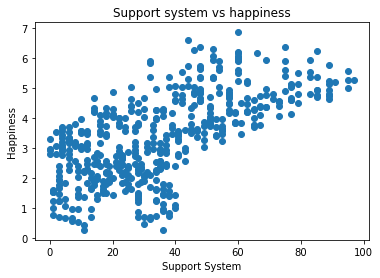

In [23]:
plt.xlabel("Support System")
plt.ylabel("Happiness")
plt.title("Support system vs happiness")
plt.scatter(dfHappy["ff"],dfHappy["happiness"])

### Predictor variable = ff, Step2.



The equation of the regression line is: y = 1.96365 + 0.04000x


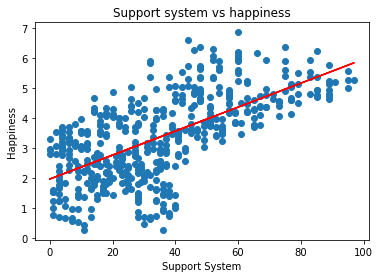

In [24]:
plt.xlabel("Support System")
plt.ylabel("Happiness")
plt.title("Support system vs happiness")
plt.scatter(dfHappy["ff"],dfHappy["happiness"])
ffbhat, ffahat, ffrval, ffpval, ffstderr = stats.linregress(dfHappy["ff"], dfHappy["happiness"])
plt.plot(dfHappy["ff"], ffahat + (ffbhat * dfHappy["ff"]), color = "red")
print("The equation of the regression line is: y = {:.5f} + {:.5f}x".format(ffahat, ffbhat))

### Predictor variable = ff, Step3.

The $R^2$ value, as shown below, is roughly 0.4144. This is a relatively low $R^2$ value, and shows that our model does not explain the proportion of total variance within our data very well. However, we cannot say anything about whether we have a correct model with this, just that the scope of our variance isn't covered too well by the model we have created.

In [25]:
print("The R^2 value for support system vs. happiness is: {}".format(ffrval**2))

The R^2 value for support system vs. happiness is: 0.4143988161230123


### Predictor variable = ff, Step4.

As we can see below, our confidence interval (0.03448, 0.04552) does not include 0. This means that, significant at a 99% level of confidence, this data shows that there is a relationship between support systems and happiness. Furthermore, our slope (0.04) IS included within this confidence interval.

In [26]:
l_ff_CI = ffbhat - (tcrit * ffstderr)
u_ff_CI = ffbhat + (tcrit * ffstderr)
print("The 99% CI for the slope of support system vs happiness is: [{},{}]".format(l_ff_CI,u_ff_CI))

The 99% CI for the slope of support system vs happiness is: [0.034480580161586144,0.04552262349865638]


### Predictor variable = ff, Step5.

As shown below, our p-value is once again incredibly small. Since our p-val < 0.01, we $\textbf{Reject the null hypothesis}$ at a 1% significance level. That is to say, we have evidence suggesting that having a support system and happiness have a relationship.

In [27]:
print("The p-value for the slope between support systems and happiness is: p = {}".format(ffpval))

The p-value for the slope between support systems and happiness is: p = 1.2862633925249048e-59


# Problem 2

Instead of looking at each individual predictor, fit a multiple linear regression model to the happiness data.

## Part A

***(4 points)*** Use `model = sm.OLS(y, X).fit()` to find the estimated parameters and based on these parameters estimated by the model, replace the unknown $\hat{\beta}_j$ parameters below with the actual values in the model.

$$
\texttt{happiness} = \text{constant} + \beta_{sugar} \times \texttt{grmsSgr} + \beta_{BMI} \times \texttt{BMI} + \beta_{screen} \times \texttt{screentime} + \beta_{sun}\times \texttt{sunlight} + \beta_{ff}\times \texttt{ff}
$$


In [28]:
# Code here:
X = dfHappy[["grmsSgr", "BMI", "screentime","sunlight","ff"]]
X = sm.add_constant(X)
y = dfHappy["happiness"]
model = sm.OLS(y,X).fit()
print(model.params)

const         4.027108
grmsSgr      -0.021068
BMI          -0.007613
screentime   -0.008401
sunlight      0.022160
ff            0.004445
dtype: float64


$\color{red}{\text{Solution for Part A, the model is...:}}$

$$
\texttt{happiness} = 4.0271 -0.0211 \times \texttt{grmsSgr} - 0.0076 \times \texttt{BMI} \\- 0.0084 \times \texttt{screentime} + 0.0222\times \texttt{sunlight} + 0.0044\times \texttt{ff}
$$

### Part B

***(3 points)*** According to a p-value argument, should we discard any predictor variables?

To answer this, run `model.summary()` to check the validity of your $\beta_j$ coefficients, i.e. check to see if a given predictor variable can be eliminated from the model due to its non-relationship with the response variable, and name that variable in your solution.

In [29]:
# Code here:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1310.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.20e-281
Time:                        20:56:29   Log-Likelihood:                -222.53
No. Observations:                 498   AIC:                             457.1
Df Residuals:                     492   BIC:                             482.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0271      0.201     20.044      0.000       3.632       4.422
grmsSgr       -0.0211      0.002    -12.261      0.000      -0.024      -0.018
BMI           -0.0076      0.006     -1.323      0.186      -0.019       0.004
screentime    -0.0084      0.001    -15.680      0.000      -0.009      -0.007
sunlight       0.0222      0.001     18.485      0.000       0.020       0.025
ff             0.0044      0.001      4.672      0.000       0.003       0.006
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.155
Skew:                          -0.026   Prob(JB):                        0.926
Kurtosis:                       3.069   Cond. No.                     1.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\color{red}{\text{Solution for Part B:}}$

According to these p-values, it seems that there is not really a relationship between BMI and happiness. Therefore, we should $\textbf{DISCARD the BMI}$ predictor variable, since it is the only one with a p-value that is non significant here.

### Part C

***(3 points)*** Which two variables have the strongest influence on happiness?

$\color{red}{\text{Solution for Part C:}}$

Whichever of these predictor variables have the largest |T score| will have the strongest influence, since we are judging upon the slopes being equal. Therefore, the two strongest influences on happiness, based on this data, are $\textbf{screentime and sunlight.}$

### Part D

***(6 points)*** Find any colinearity issues in this model and create three graphs for the three biggest offending variables to get a visual of the colinearity.

Looking at the correlation, the three strongest correlated variables are

1. sunlight and grams of sugar

2. screentime and sunlight

3. screentime and grams of sugar

In [30]:
# Code here:
dfHappy[["grmsSgr", "BMI", "screentime","sunlight","ff"]].corr()

,grmsSgr,BMI,screentime,sunlight,ff
grmsSgr,1.000000,0.070208,0.749181,-0.788105,-0.556069
BMI,0.070208,1.000000,0.029886,-0.067274,-0.058958
screentime,0.749181,0.029886,1.000000,-0.777234,-0.539554
sunlight,-0.788105,-0.067274,-0.777234,1.000000,0.613576
ff,-0.556069,-0.058958,-0.539554,0.613576,1.000000


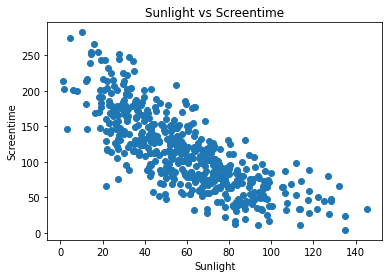

In [31]:
#Code here:
plt.xlabel("Sunlight")
plt.ylabel("Screentime")
plt.title("Sunlight vs Screentime")
plt.scatter(dfHappy["sunlight"], dfHappy["screentime"])

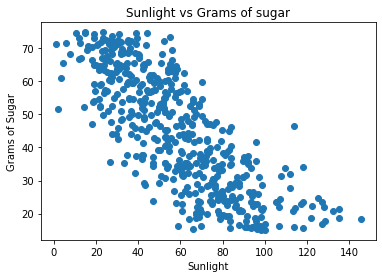

In [32]:
plt.xlabel("Sunlight")
plt.ylabel("Grams of Sugar")
plt.title("Sunlight vs Grams of sugar")
plt.scatter(dfHappy["sunlight"], dfHappy["grmsSgr"])

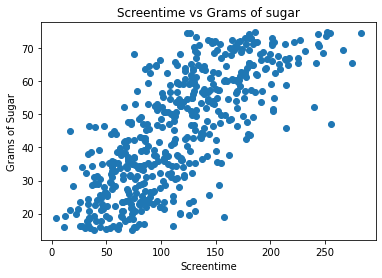

In [33]:
plt.xlabel("Screentime")
plt.ylabel("Grams of Sugar")
plt.title("Screentime vs Grams of sugar")
plt.scatter(dfHappy["screentime"], dfHappy["grmsSgr"])

It appears that the strongest related predictor variables in this data set are sunlight and screentime. However, it appears to be that grams of sugar has a strong relation to virtually every other predictor var.

### Part E

***(4 points)*** Simplify the model by eliminating variables with colinearity. Choose one variable with the strongest affect on happiness and provide an SLR model. What would the linear regression model be?

In [34]:
# Code here:
#eliminating 2 of the 3 strongest colinear variable (screentime, and grams of sugar)
#eliminating BMI, because it is not shown to be strongly related to happiness 
X = dfHappy[["sunlight","ff"]]
X = sm.add_constant(X)
y = dfHappy["happiness"]
model = sm.OLS(y,X).fit()
print(model.params)
model.summary()

const       0.529721
sunlight    0.043939
ff          0.008310
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1351.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          2.97e-201
Time:                        20:56:29   Log-Likelihood:                -420.70
No. Observations:                 498   AIC:                             847.4
Df Residuals:                     495   BIC:                             860.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5297      0.061      8.738      0.000       0.411       0.649
sunlight       0.0439      0.001     37.115      0.000       0.042       0.046
ff             0.0083      0.001      5.971      0.000       0.006       0.011
==============================================================================
Omnibus:                        8.157   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.263
Skew:                          -0.265   Prob(JB):                       0.0161
Kurtosis:                       3.341   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The updated SLR model is found below, with other valid predictor variables making a difference.
The equation of this line, given by the model above, is: y = 0.5297 + (.043939)x


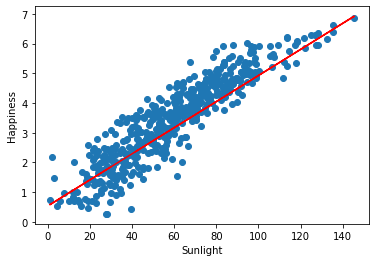

In [35]:
#SLR model, using the data found above
plt.xlabel("Sunlight")
plt.ylabel("Happiness")
plt.scatter(dfHappy["sunlight"], dfHappy["happiness"])
plt.plot(dfHappy["sunlight"], 0.5297 + (.043939 * dfHappy["sunlight"]), color = "red")
print("The updated SLR model is found below, with other valid predictor variables making a difference.")
print("The equation of this line, given by the model above, is: y = 0.5297 + (.043939)x")

The actual SLR, just considering the two variables is listed above in problem 1.
The SLR equation (just taking into account sunlight and happiness) is: y = 0.57330 + 0.04828x


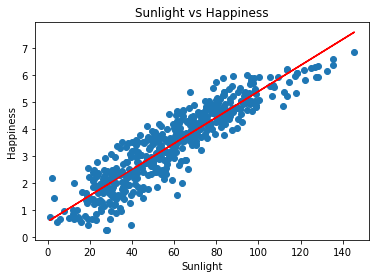

In [38]:
#actual SLR
print("The actual SLR, just considering the two variables is listed above in problem 1.")
print("The SLR equation (just taking into account sunlight and happiness) is: y = 0.57330 + 0.04828x")
plt.xlabel("Sunlight")
plt.ylabel("Happiness")
plt.title("Sunlight vs Happiness")
plt.scatter(dfHappy["sunlight"],dfHappy["happiness"])
sunbhat, sunahat, sunrval, sunpval, sunstderr = stats.linregress(dfHappy["sunlight"], dfHappy["happiness"])
plt.plot(dfHappy["sunlight"], sunahat + (sunbhat * dfHappy["sunlight"]), color = "red")

### Rubric Check
***
***(5 points)*** Make sure your answers are thorough but not redundant. Explain your answers, don't just put a number. Make sure you have matched your questions on Gradescope. Make sure your PDF is correct and your LaTeX is correct. etc. etc. BE NEAT.

***
# End of assignment
***

# OPTIONAL (Just for fun)

*** $\color{red}{\text{No work to be done here}}$. This is just some code to play with if you are interested.***

                            OLS Regression Results                            
Dep. Variable:               sunlight   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2493.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.42e-195
Time:                        20:56:29   Log-Likelihood:                -1902.2
No. Observations:                 498   AIC:                             3808.
Df Residuals:                     496   BIC:                             3817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2119      1.274     -0.166      0.8

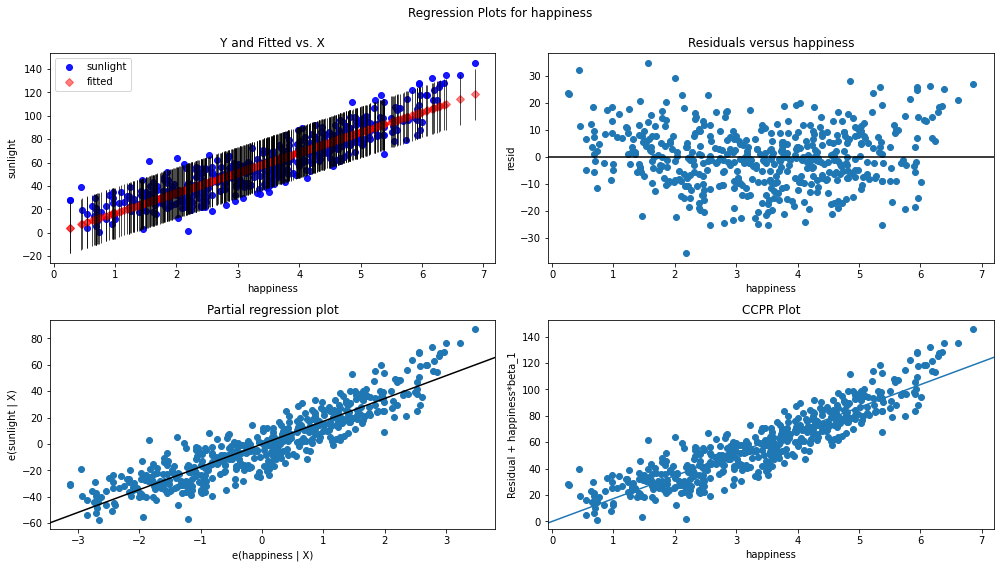

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
# fit simple linear regression model
linear_model = ols('sunlight ~ happiness',
                   data=dfHappy).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    'happiness',
                                    fig=fig)